In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/child-mind-institute-problematic-internet-use/sample_submission.csv
/kaggle/input/child-mind-institute-problematic-internet-use/data_dictionary.csv
/kaggle/input/child-mind-institute-problematic-internet-use/train.csv
/kaggle/input/child-mind-institute-problematic-internet-use/test.csv
/kaggle/input/child-mind-institute-problematic-internet-use/series_test.parquet/id=00115b9f/part-0.parquet
/kaggle/input/child-mind-institute-problematic-internet-use/series_test.parquet/id=001f3379/part-0.parquet
/kaggle/input/child-mind-institute-problematic-internet-use/series_train.parquet/id=0745c390/part-0.parquet
/kaggle/input/child-mind-institute-problematic-internet-use/series_train.parquet/id=eaab7a96/part-0.parquet
/kaggle/input/child-mind-institute-problematic-internet-use/series_train.parquet/id=8ec2cc63/part-0.parquet
/kaggle/input/child-mind-institute-problematic-internet-use/series_train.parquet/id=b2987a65/part-0.parquet
/kaggle/input/child-mind-institute-problematic-intern

# Import Libararies

In [2]:
import pandas as pd
import plotly.express as px
import plotly.subplots as sp
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import plotly.graph_objects as go

from plotly.subplots import make_subplots
import math

import warnings
warnings.filterwarnings("ignore")

import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import cohen_kappa_score, classification_report
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Dataset Loading

In [3]:
train_df = pd.read_csv('/kaggle/input/child-mind-institute-problematic-internet-use/train.csv')
data_dictionary = pd.read_csv('/kaggle/input/child-mind-institute-problematic-internet-use/data_dictionary.csv')

In [4]:
print(train_df.shape)
train_df.head(5)

(3960, 82)


,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,...,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii
0,00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.0,50.8,...,4.0,2.0,4.0,55.0,NaN,NaN,NaN,Fall,3.0,2.0
1,000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.0,46.0,...,0.0,0.0,0.0,0.0,Fall,46.0,64.0,Summer,0.0,0.0
2,00105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.5,75.6,...,2.0,1.0,1.0,28.0,Fall,38.0,54.0,Summer,2.0,0.0
3,00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.0,81.6,...,3.0,4.0,1.0,44.0,Summer,31.0,45.0,Winter,0.0,1.0
4,0016bb22,Spring,18,1,Summer,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
train_df.columns

Index(['id', 'Basic_Demos-Enroll_Season', 'Basic_Demos-Age', 'Basic_Demos-Sex',
       'CGAS-Season', 'CGAS-CGAS_Score', 'Physical-Season', 'Physical-BMI',
       'Physical-Height', 'Physical-Weight', 'Physical-Waist_Circumference',
       'Physical-Diastolic_BP', 'Physical-HeartRate', 'Physical-Systolic_BP',
       'Fitness_Endurance-Season', 'Fitness_Endurance-Max_Stage',
       'Fitness_Endurance-Time_Mins', 'Fitness_Endurance-Time_Sec',
       'FGC-Season', 'FGC-FGC_CU', 'FGC-FGC_CU_Zone', 'FGC-FGC_GSND',
       'FGC-FGC_GSND_Zone', 'FGC-FGC_GSD', 'FGC-FGC_GSD_Zone', 'FGC-FGC_PU',
       'FGC-FGC_PU_Zone', 'FGC-FGC_SRL', 'FGC-FGC_SRL_Zone', 'FGC-FGC_SRR',
       'FGC-FGC_SRR_Zone', 'FGC-FGC_TL', 'FGC-FGC_TL_Zone', 'BIA-Season',
       'BIA-BIA_Activity_Level_num', 'BIA-BIA_BMC', 'BIA-BIA_BMI',
       'BIA-BIA_BMR', 'BIA-BIA_DEE', 'BIA-BIA_ECW', 'BIA-BIA_FFM',
       'BIA-BIA_FFMI', 'BIA-BIA_FMI', 'BIA-BIA_Fat', 'BIA-BIA_Frame_num',
       'BIA-BIA_ICW', 'BIA-BIA_LDM', 'BIA-BIA_LST'

In [6]:
print(data_dictionary.shape)
data_dictionary.head(5)

(81, 6)


,Instrument,Field,Description,Type,Values,Value Labels
0,Identifier,id,Participant's ID,str,NaN,NaN
1,Demographics,Basic_Demos-Enroll_Season,Season of enrollment,str,"Spring, Summer, Fall, Winter",NaN
2,Demographics,Basic_Demos-Age,Age of participant,float,NaN,NaN
3,Demographics,Basic_Demos-Sex,Sex of participant,categorical int,"0,1","0=Male, 1=Female"
4,Children's Global Assessment Scale,CGAS-Season,Season of participation,str,"Spring, Summer, Fall, Winter",NaN


# Exploratory Data Analysis

## Understanding the Distribution of the Target Variable (sii) 

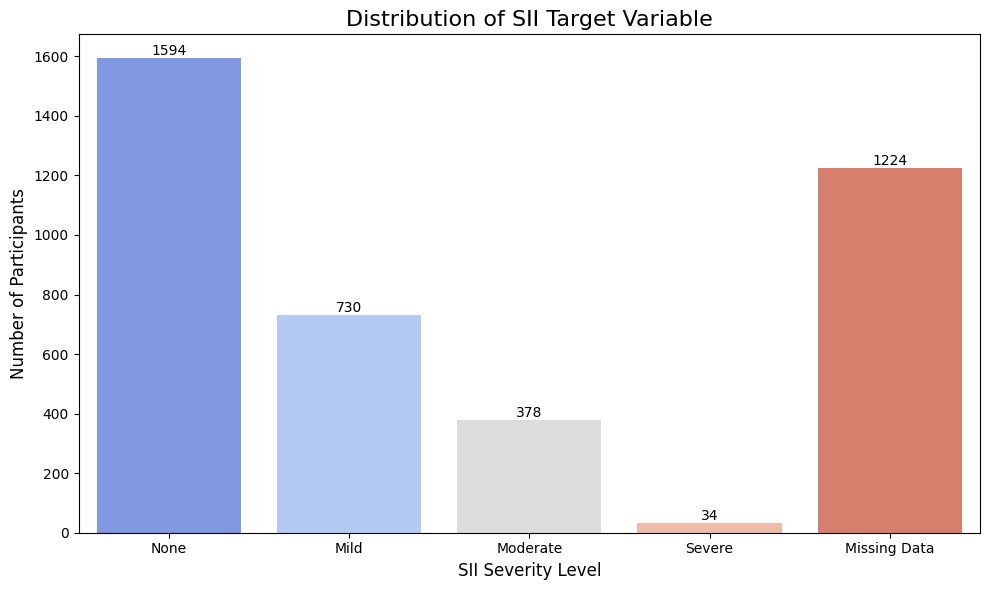

In [7]:
# Ensure the missing category is included
train_df['sii_category'] = train_df['sii'].fillna('Missing')

# Map `sii` categories to readable labels
label_mapping = {0: 'None', 1: 'Mild', 2: 'Moderate', 3: 'Severe', 'Missing': 'Missing Data'}
train_df['sii_category'] = train_df['sii_category'].replace(label_mapping)

# Set the order for the categories
category_order = ['None', 'Mild', 'Moderate', 'Severe', 'Missing Data']

# Plot
plt.figure(figsize=(10, 6)) 
ax = sns.countplot(
    x='sii_category',
    data=train_df,
    order=category_order,
    palette='coolwarm'
)

# Add count annotations using enumerate and .text
for i, count in enumerate(train_df['sii_category'].value_counts().reindex(category_order)):
    ax.text(i, count + 10, str(count), ha='center', fontsize=10, color='black')

# Add titles and labels
plt.title('Distribution of SII Target Variable', fontsize=16)
plt.xlabel('SII Severity Level', fontsize=12)
plt.ylabel('Number of Participants', fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()

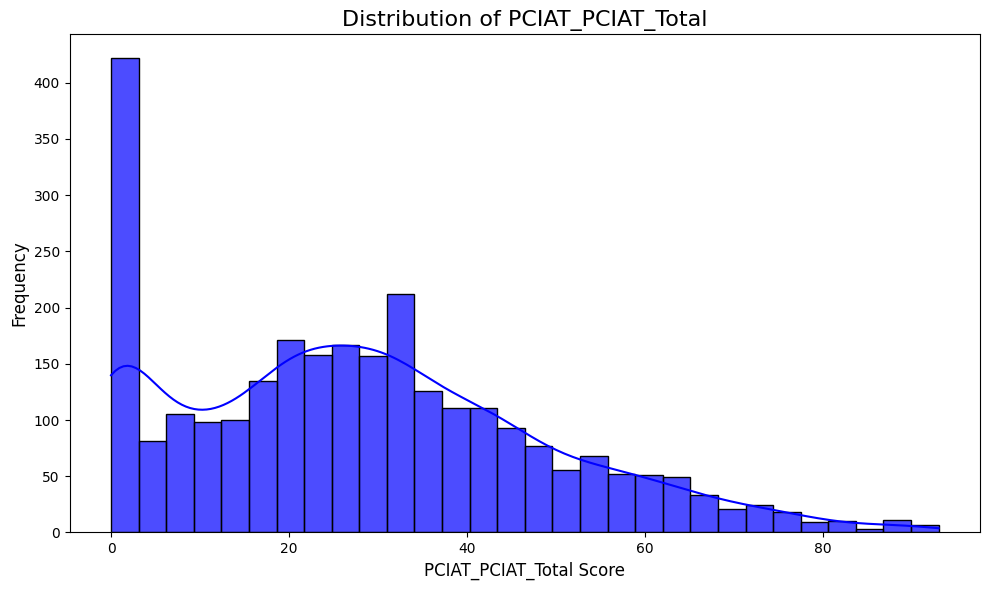

In [8]:
# Drop missing values for PCIAT_PCIAT_Total
pciat_total = train_df['PCIAT-PCIAT_Total'].dropna()

# Plot the distribution
plt.figure(figsize=(10, 6)) 
sns.histplot(pciat_total, bins=30, kde=True, color='blue', alpha=0.7)
plt.title('Distribution of PCIAT_PCIAT_Total', fontsize=16)
plt.xlabel('PCIAT_PCIAT_Total Score', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

## Gender Distribution

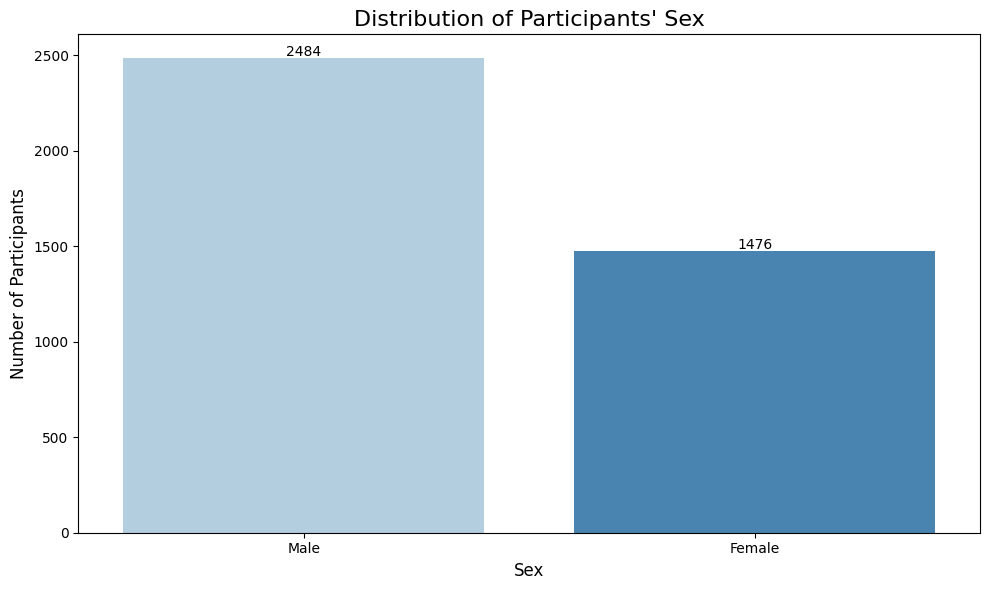

In [9]:
# Map the gender values to readable labels
gender_mapping = {0: 'Male', 1: 'Female'}
train_df['Basic_Demos-Sex'] = train_df['Basic_Demos-Sex'].replace(gender_mapping)

# Plot gender distribution
plt.figure(figsize=(10, 6))  # Set figure size
sns.countplot(x='Basic_Demos-Sex', data=train_df, palette='Blues')

# Add count annotations
gender_counts = train_df['Basic_Demos-Sex'].value_counts()
for i, count in enumerate(gender_counts):
    plt.text(i, count + 10, str(count), ha='center', fontsize=10, color='black')

# Add titles and labels
plt.title("Distribution of Participants' Sex", fontsize=16)
plt.xlabel('Sex', fontsize=12)
plt.ylabel('Number of Participants', fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()

## Age Distribution

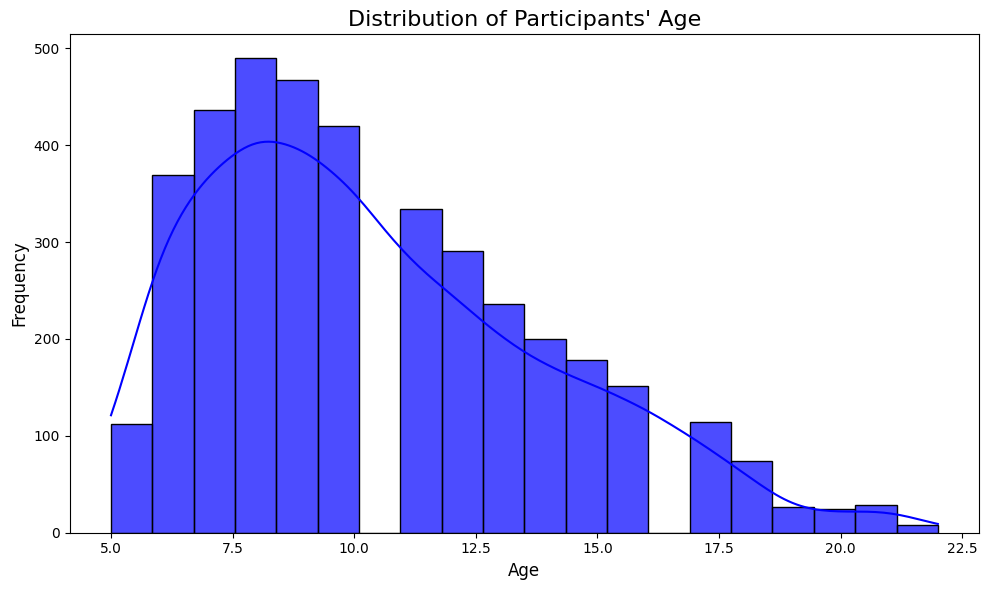

In [10]:
# Plot age distribution as a histogram
plt.figure(figsize=(10, 6)) 
sns.histplot(train_df['Basic_Demos-Age'], bins=20, kde=True, color='blue', alpha=0.7)

# Add titles and labels
plt.title('Distribution of Participants\' Age', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()

## Internet Usage Distribution

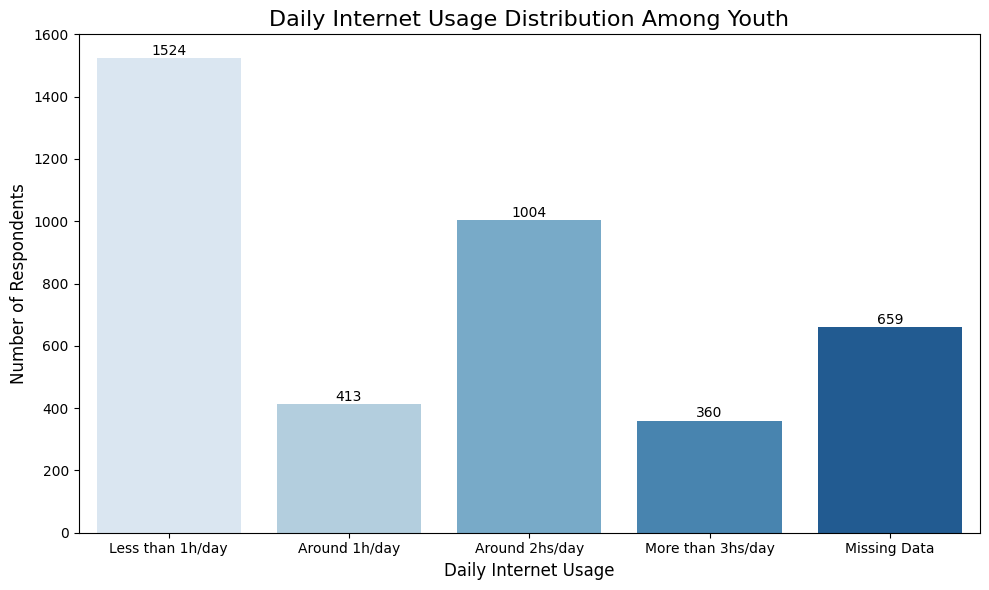

In [11]:
# Map numerical values to descriptive categories
usage_mapping = {
    0.0: 'Less than 1h/day',
    1.0: 'Around 1h/day',
    2.0: 'Around 2hs/day',
    3.0: 'More than 3hs/day'
}
train_df['internet_usage_category'] = train_df['PreInt_EduHx-computerinternet_hoursday'].map(usage_mapping)
train_df['internet_usage_category'] = train_df['internet_usage_category'].fillna('Missing Data')

# Plot the distribution
plt.figure(figsize=(10, 6))  # Adjust the figure size
ax = sns.countplot(
    x='internet_usage_category',
    data=train_df,
    order=['Less than 1h/day', 'Around 1h/day', 'Around 2hs/day', 'More than 3hs/day', 'Missing Data'],
    palette='Blues'
)

# Add count annotations
usage_counts = train_df['internet_usage_category'].value_counts()
for i, count in enumerate(usage_counts.reindex(['Less than 1h/day', 'Around 1h/day', 'Around 2hs/day', 'More than 3hs/day', 'Missing Data'])):
    ax.text(i, count + 10, str(count), ha='center', fontsize=10, color='black')

# Add titles and labels
plt.title('Daily Internet Usage Distribution Among Youth', fontsize=16)
plt.xlabel('Daily Internet Usage', fontsize=12)
plt.ylabel('Number of Respondents', fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()

## Physical Measures Distribution

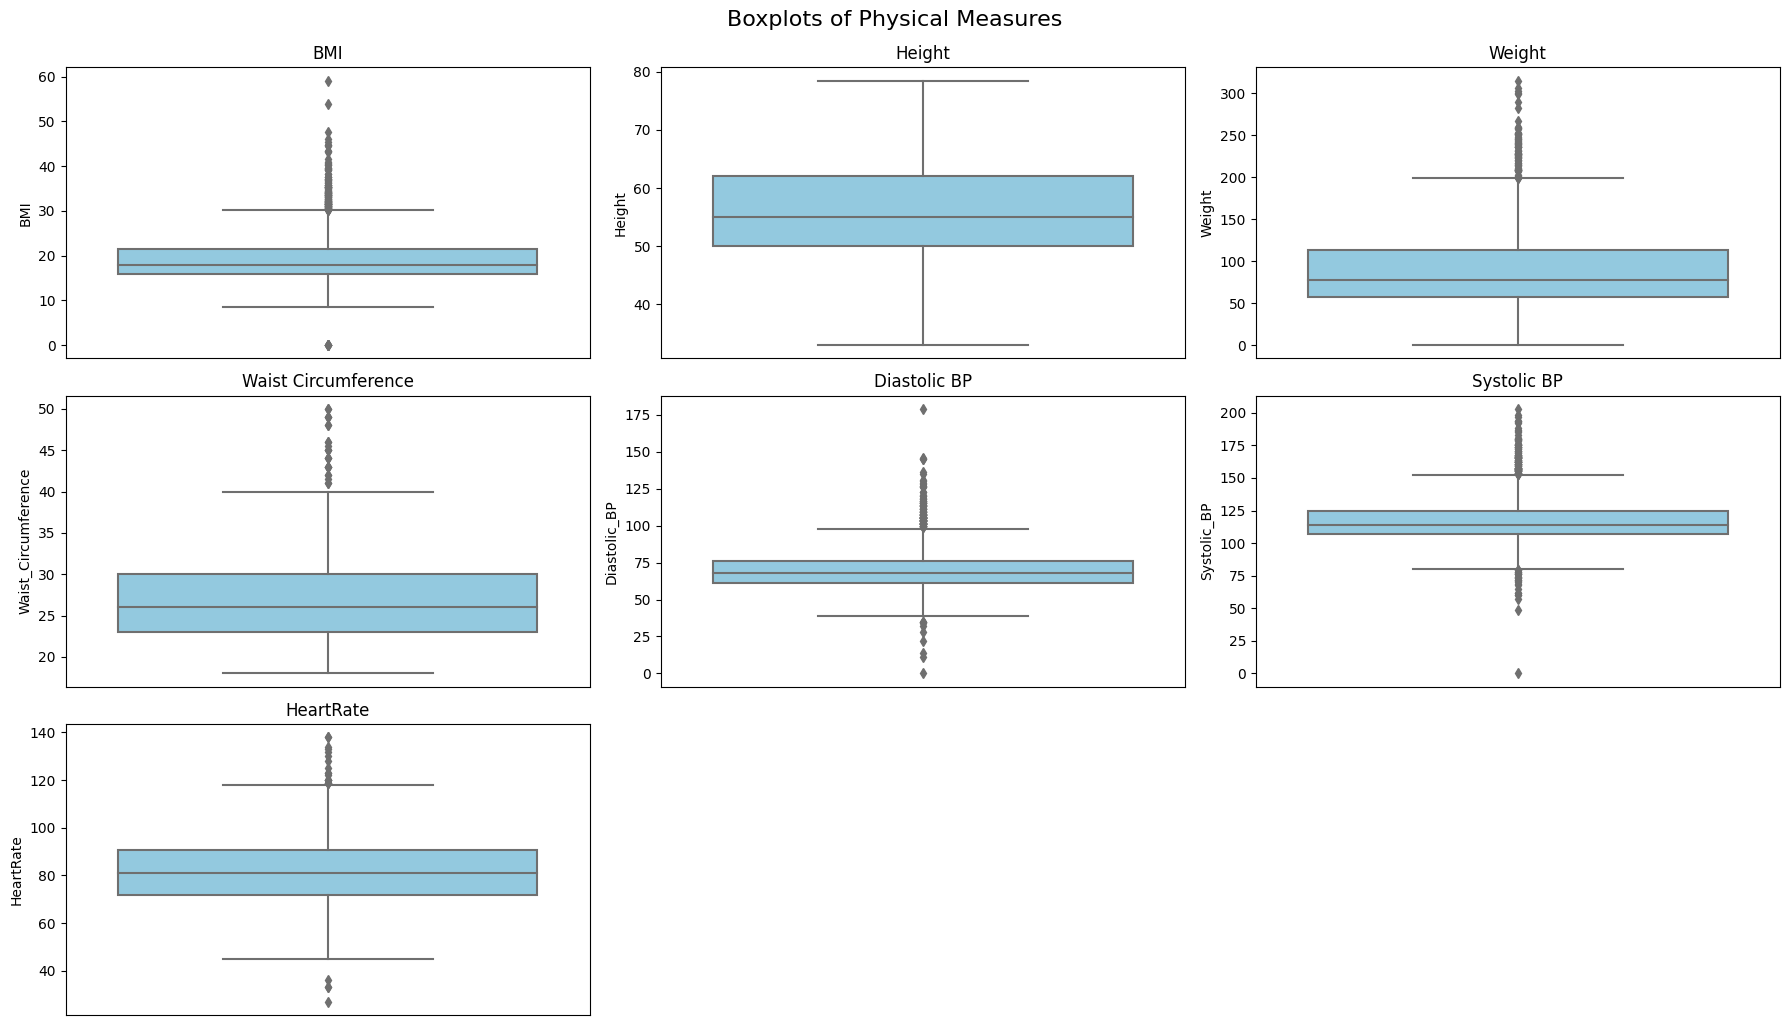

In [12]:
# List of physical measures
physical_cols = [
    'Physical-BMI', 'Physical-Height', 'Physical-Weight',
    'Physical-Waist_Circumference', 'Physical-Diastolic_BP',
    'Physical-Systolic_BP', 'Physical-HeartRate'
]

# Set up the grid layout
n_cols = 3  # Number of columns
n_rows = -(-len(physical_cols) // n_cols)  # Calculate rows needed
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 10))  # Adjust figure size
axes = axes.flatten()

# Plot boxplots for each physical measure
for idx, col in enumerate(physical_cols):
    sns.boxplot(y=train_df[col], ax=axes[idx], color='skyblue')
    axes[idx].set_title(col.replace('Physical-', '').replace('_', ' '), fontsize=12)
    axes[idx].set_ylabel(col.split('-')[-1], fontsize=10)
    axes[idx].tick_params(axis='x', bottom=False, labelbottom=False)  # Hide x-axis ticks

# Remove extra subplots (if any)
for ax in axes[len(physical_cols):]:
    fig.delaxes(ax)

# Adjust layout
plt.tight_layout()
plt.suptitle("Boxplots of Physical Measures", fontsize=16, y=1.02)
plt.show()

## FitnessGram Vitals and Treadmill Distribution

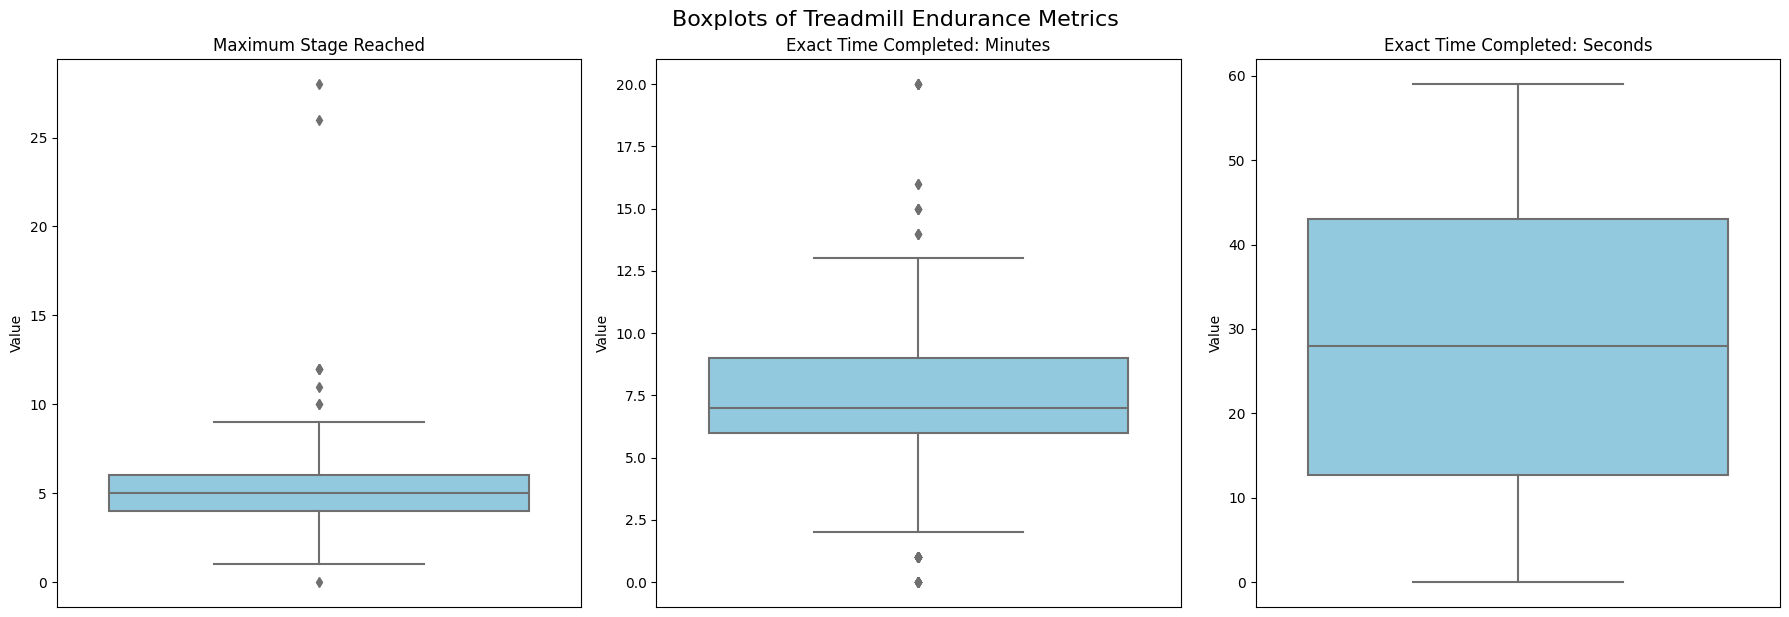

In [13]:
# List of treadmill variables with descriptive titles
treadmill_cols = [
    ('Fitness_Endurance-Max_Stage', 'Maximum Stage Reached'),
    ('Fitness_Endurance-Time_Mins', 'Exact Time Completed: Minutes'),
    ('Fitness_Endurance-Time_Sec', 'Exact Time Completed: Seconds')
]

# Set up the grid layout for boxplots
fig, axes = plt.subplots(1, len(treadmill_cols), figsize=(18, 6))  # One row for all boxplots

# Plot each variable
for idx, (col, title) in enumerate(treadmill_cols):
    sns.boxplot(y=train_df[col], ax=axes[idx], color='skyblue')
    axes[idx].set_title(title, fontsize=12)  # Use the descriptive title
    axes[idx].set_ylabel('Value', fontsize=10)
    axes[idx].tick_params(axis='x', bottom=False, labelbottom=False)  # Hide x-axis ticks

# Adjust layout
plt.tight_layout()
plt.suptitle('Boxplots of Treadmill Endurance Metrics', fontsize=16, y=1.02)
plt.show()

## FitnessGram Child Distribution

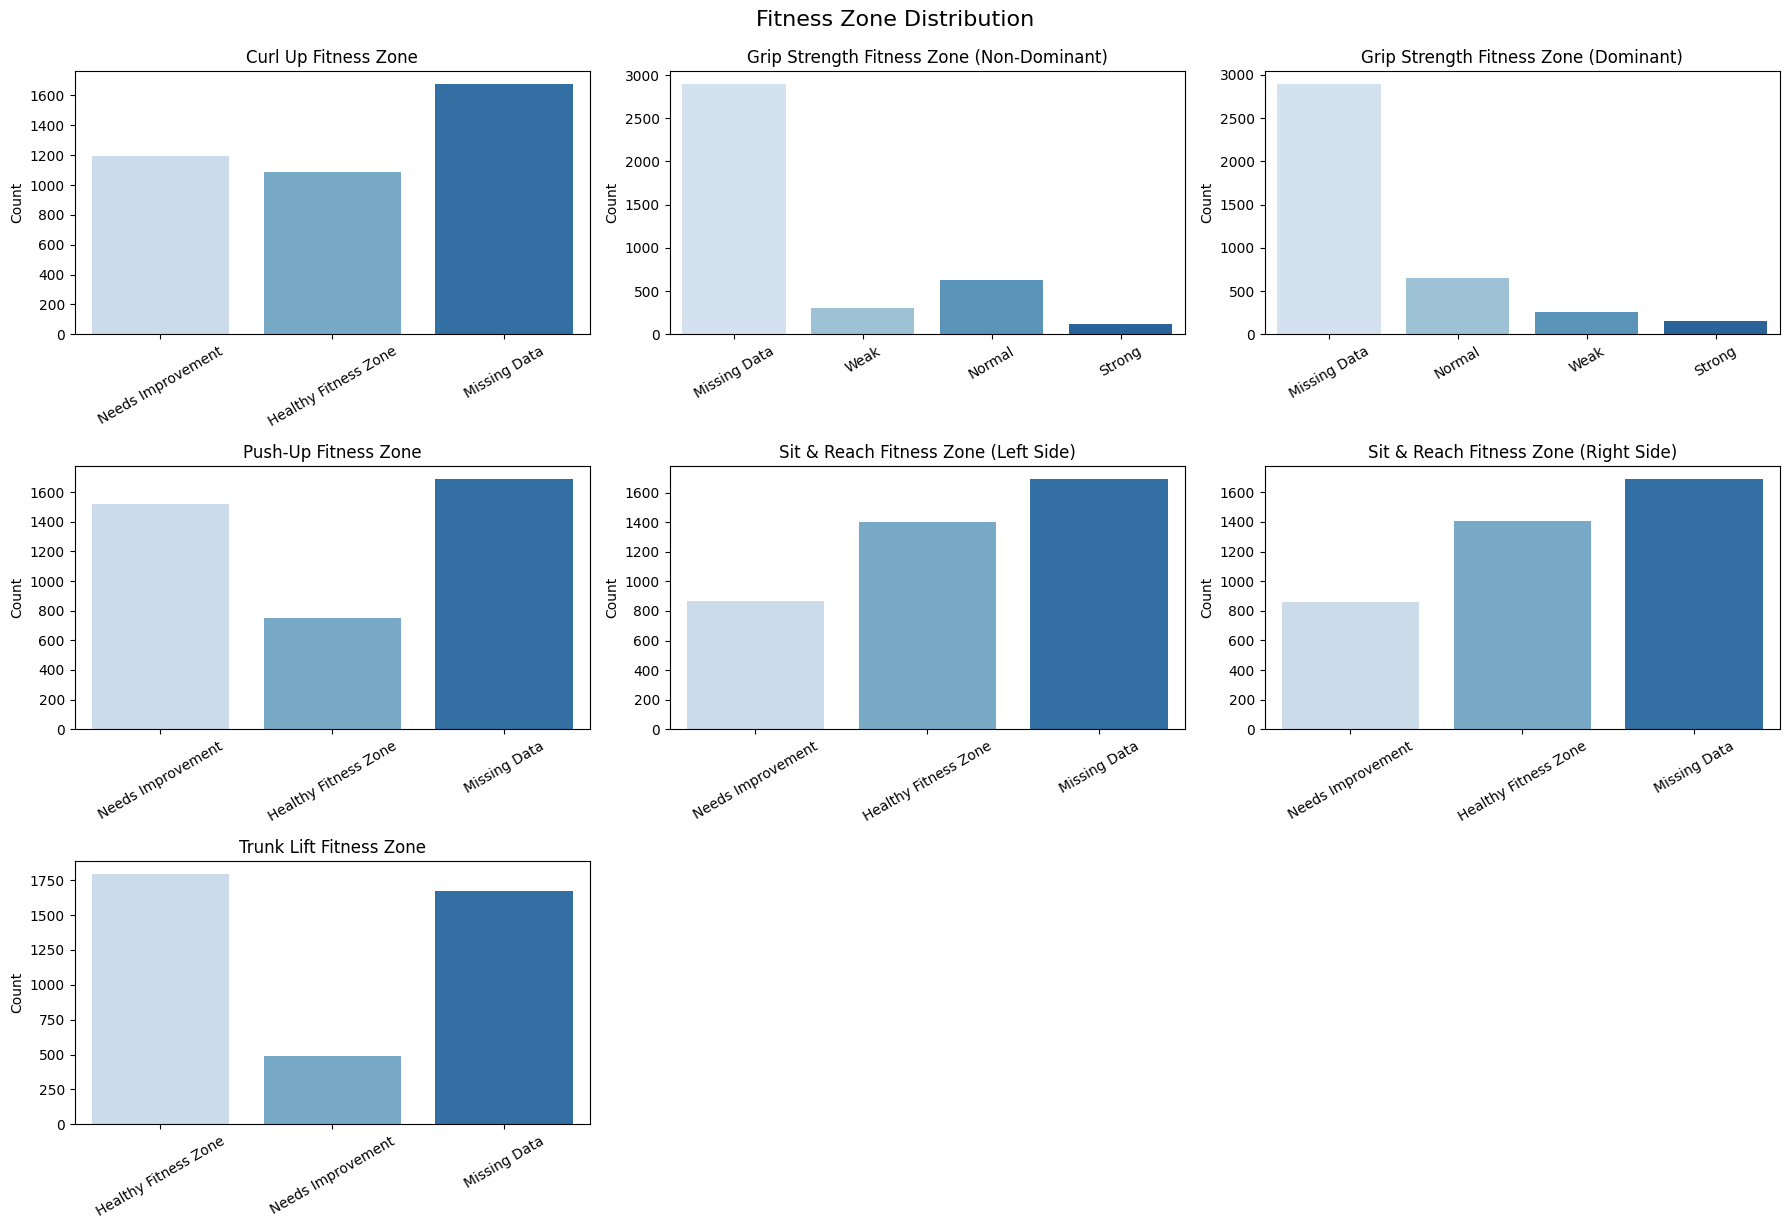

In [14]:
# Define mappings for categorical zones
zone_mapping_binary = {
    0: "Needs Improvement",
    1: "Healthy Fitness Zone",
    None: "Missing Data"  # Add missing data label
}

zone_mapping_ternary = {
    1: "Weak",
    2: "Normal",
    3: "Strong",
    None: "Missing Data"  # Add missing data label
}

# Define the zone titles
zone_titles = {
    'FGC-FGC_CU_Zone': 'Curl Up Fitness Zone',
    'FGC-FGC_GSND_Zone': 'Grip Strength Fitness Zone (Non-Dominant)',
    'FGC-FGC_GSD_Zone': 'Grip Strength Fitness Zone (Dominant)',
    'FGC-FGC_PU_Zone': 'Push-Up Fitness Zone',
    'FGC-FGC_SRL_Zone': 'Sit & Reach Fitness Zone (Left Side)',
    'FGC-FGC_SRR_Zone': 'Sit & Reach Fitness Zone (Right Side)',
    'FGC-FGC_TL_Zone': 'Trunk Lift Fitness Zone'
}

# List of fitness zone columns and their mapping types
zone_cols = {
    'FGC-FGC_CU_Zone': zone_mapping_binary,
    'FGC-FGC_GSND_Zone': zone_mapping_ternary,
    'FGC-FGC_GSD_Zone': zone_mapping_ternary,
    'FGC-FGC_PU_Zone': zone_mapping_binary,
    'FGC-FGC_SRL_Zone': zone_mapping_binary,
    'FGC-FGC_SRR_Zone': zone_mapping_binary,
    'FGC-FGC_TL_Zone': zone_mapping_binary
}

# Replace missing values (NaN) with None for mapping
train_df_filled = train_df[zone_cols.keys()].copy()
train_df_filled = train_df_filled.where(pd.notnull(train_df_filled), None)

# Set up the grid layout for all fitness zones in one figure
n_cols = 3  # Number of columns
n_rows = -(-len(zone_cols) // n_cols)  # Calculate rows needed
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 12))  # Adjust figure size
axes = axes.flatten()

# Plot each fitness zone
for idx, (col, mapping) in enumerate(zone_cols.items()):
    data = train_df_filled[col].map(mapping)  # Map numeric values to descriptions
    sns.countplot(x=data, ax=axes[idx], palette="Blues")
    axes[idx].set_title(zone_titles[col], fontsize=12)
    axes[idx].set_xlabel("")
    axes[idx].set_ylabel("Count")
    axes[idx].tick_params(axis='x', rotation=30)

# Remove extra subplots (if any)
for ax in axes[len(zone_cols):]:
    fig.delaxes(ax)

# Adjust layout
plt.tight_layout()
plt.suptitle("Fitness Zone Distribution", fontsize=16, y=1.02)
plt.show()

## Sleep Disturbance Scale Distribution

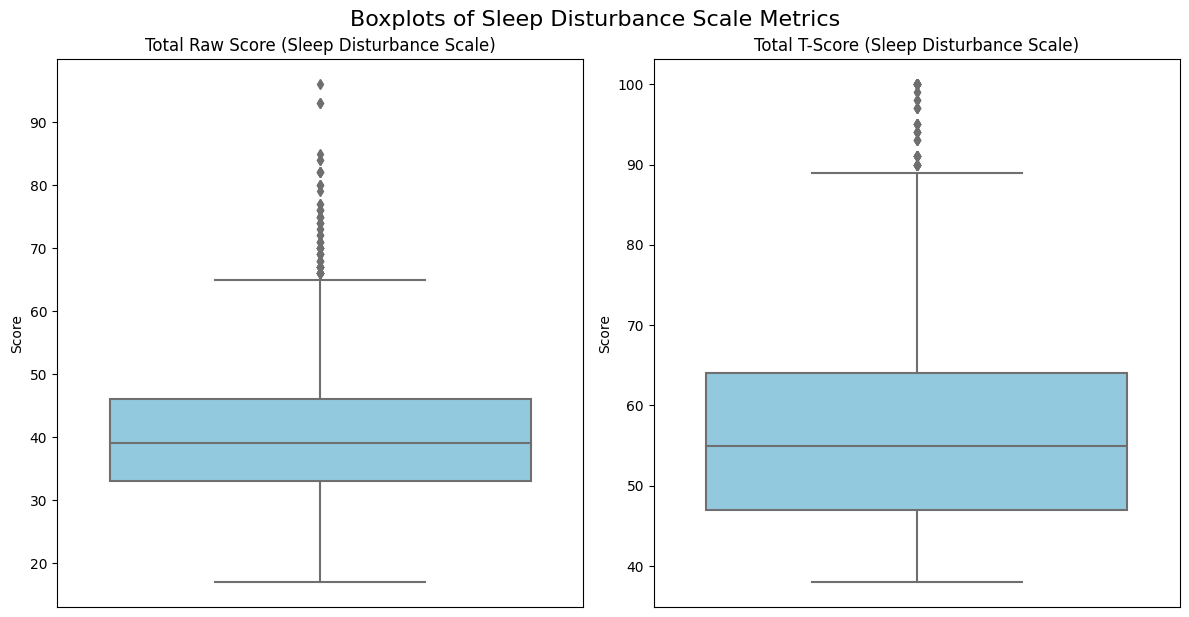

In [15]:
# List of Sleep Disturbance Scale variables
sleep_cols = [
    'SDS-SDS_Total_Raw',
    'SDS-SDS_Total_T'
]

# Define more descriptive titles
titles = {
    'SDS-SDS_Total_Raw': 'Total Raw Score (Sleep Disturbance Scale)',
    'SDS-SDS_Total_T': 'Total T-Score (Sleep Disturbance Scale)'
}

# Set up the grid layout for boxplots
fig, axes = plt.subplots(1, len(sleep_cols), figsize=(12, 6))  # One row for all boxplots

# Plot each variable
for idx, col in enumerate(sleep_cols):
    sns.boxplot(y=train_df[col], ax=axes[idx], color='skyblue')
    axes[idx].set_title(titles[col], fontsize=12)  # Use the descriptive title
    axes[idx].set_ylabel('Score', fontsize=10)
    axes[idx].tick_params(axis='x', bottom=False, labelbottom=False)  # Hide x-axis ticks

# Adjust layout
plt.tight_layout()
plt.suptitle('Boxplots of Sleep Disturbance Scale Metrics', fontsize=16, y=1.02)
plt.show()

## Correlation Heatmap Between Continuous Variables and Target Variable sii

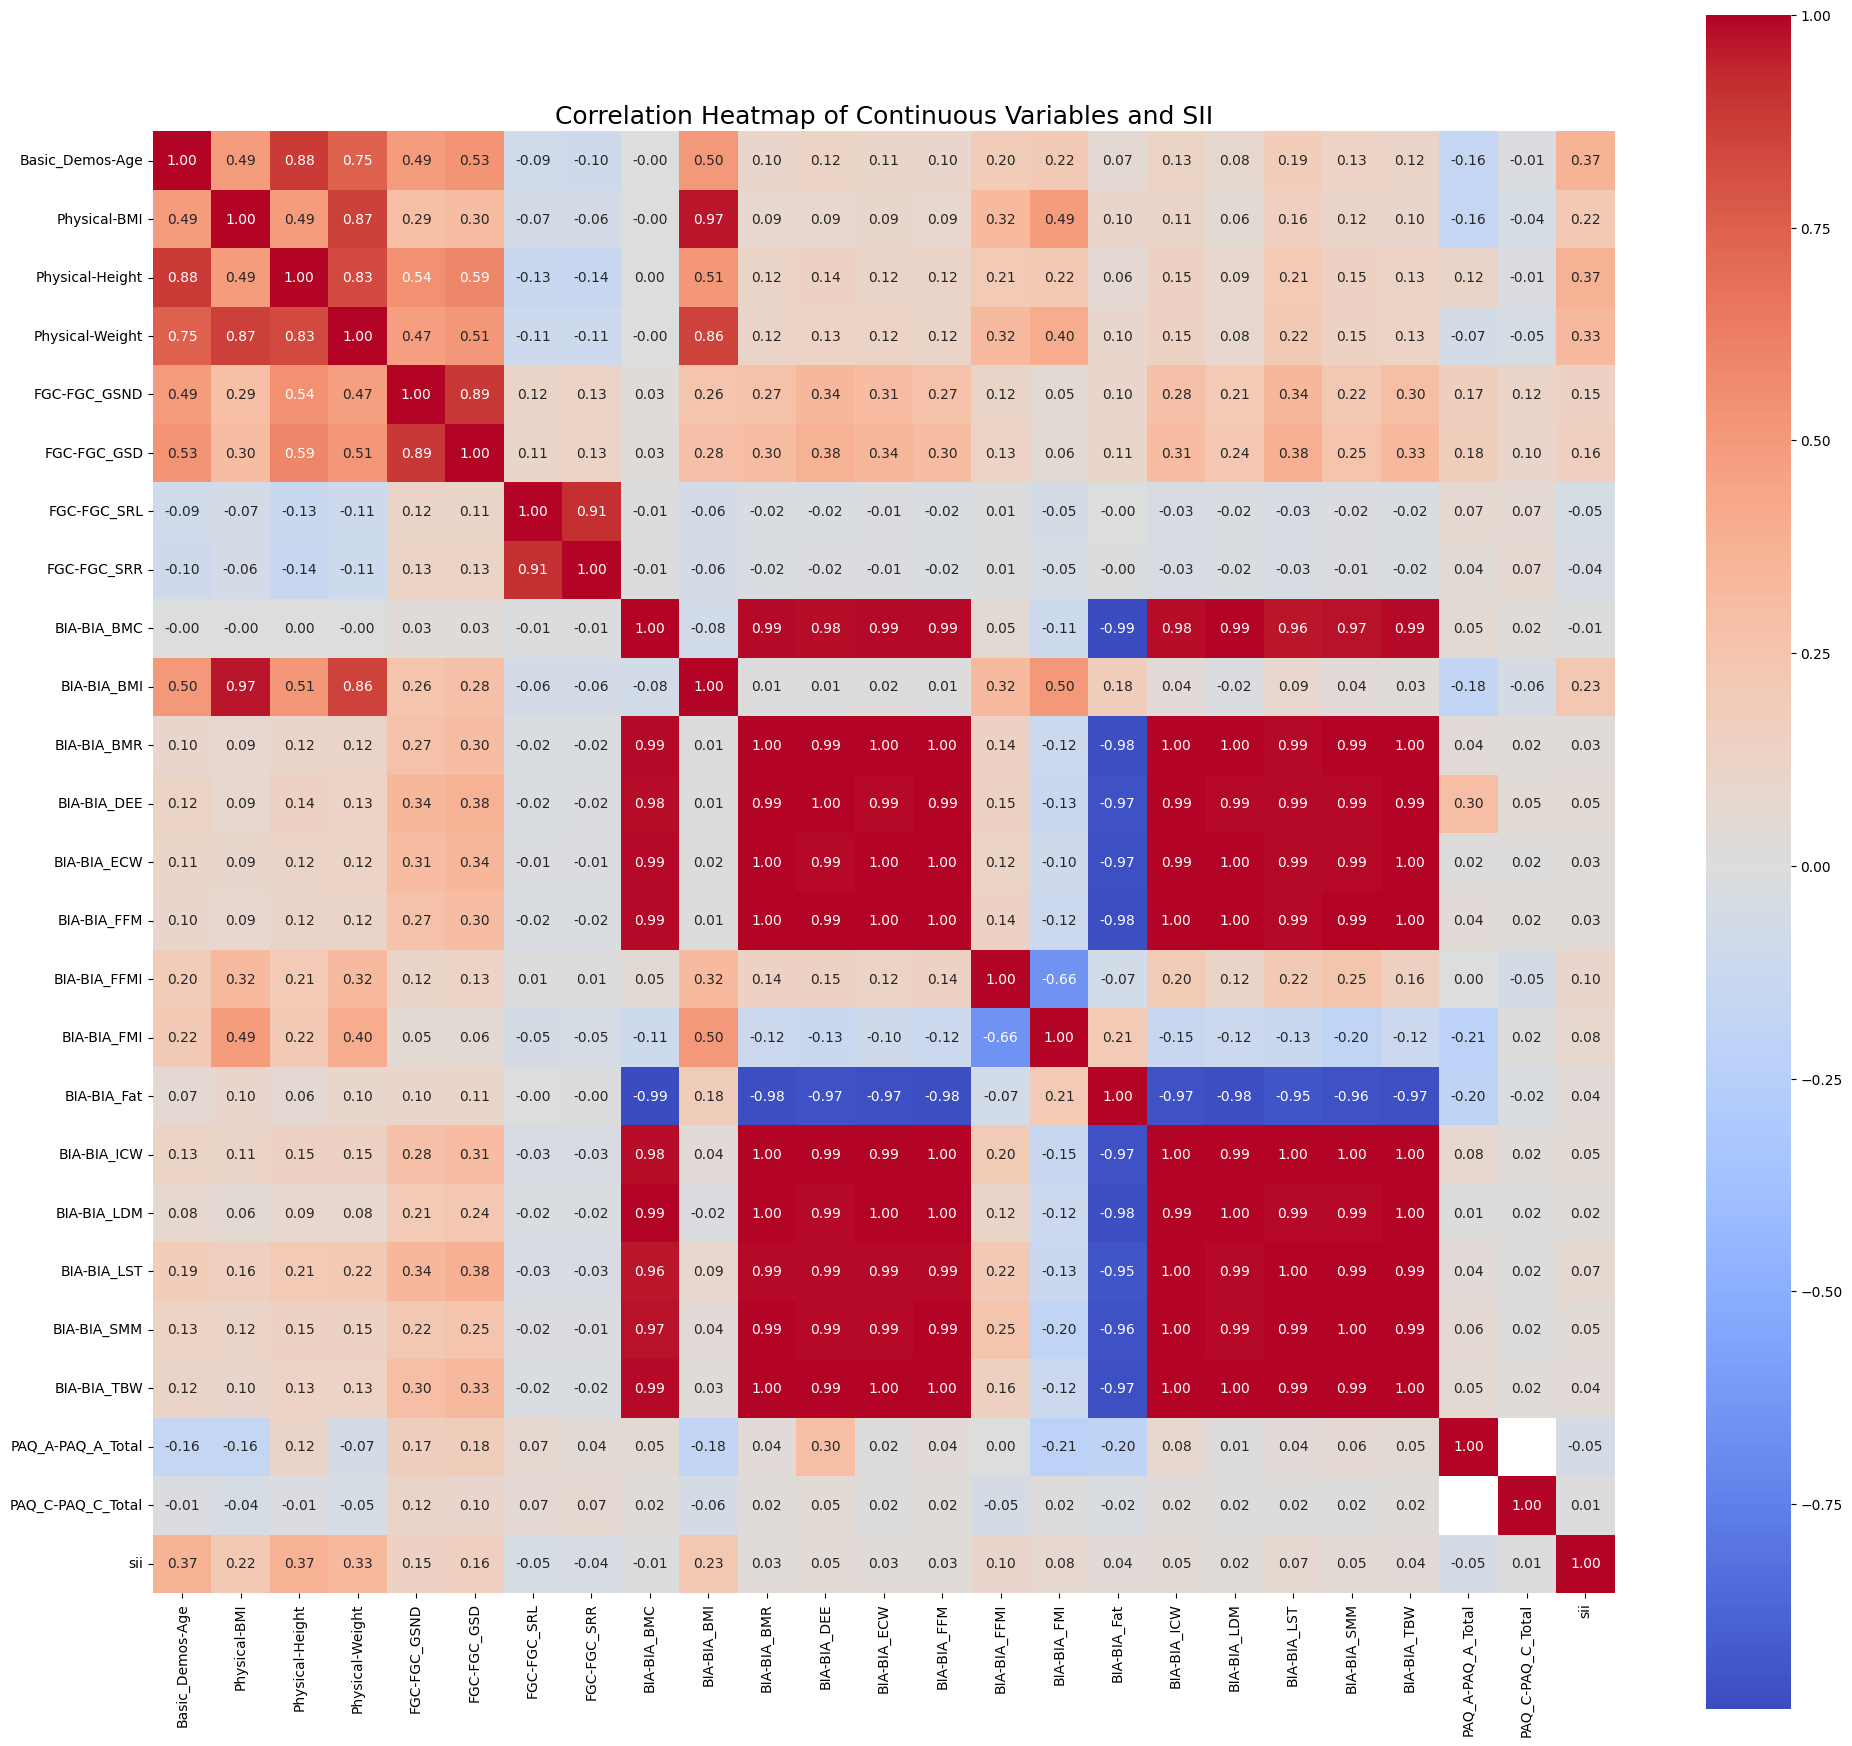

In [16]:
# Select continuous variables (numeric columns) including 'sii'
continuous_columns = [
    'Basic_Demos-Age', 'Physical-BMI', 'Physical-Height', 'Physical-Weight',
    'FGC-FGC_GSND', 'FGC-FGC_GSD', 'FGC-FGC_SRL', 'FGC-FGC_SRR',
    'BIA-BIA_BMC', 'BIA-BIA_BMI', 'BIA-BIA_BMR', 'BIA-BIA_DEE',
    'BIA-BIA_ECW', 'BIA-BIA_FFM', 'BIA-BIA_FFMI', 'BIA-BIA_FMI',
    'BIA-BIA_Fat', 'BIA-BIA_ICW', 'BIA-BIA_LDM', 'BIA-BIA_LST',
    'BIA-BIA_SMM', 'BIA-BIA_TBW', 'PAQ_A-PAQ_A_Total', 'PAQ_C-PAQ_C_Total', 'sii'
]


# Compute the full correlation matrix
correlation_matrix = train_df[continuous_columns].corr()

# Plot the full heatmap
plt.figure(figsize=(20, 18))
sns.heatmap(
    correlation_matrix, 
    annot=True, 
    fmt=".2f", 
    cmap="coolwarm", 
    cbar=True, 
    square=True
)
plt.title("Correlation Heatmap of Continuous Variables and SII", fontsize=18)
plt.tight_layout()
plt.show()

# Preprocessing

## Load Data

In [17]:
train_df = pd.read_csv('/kaggle/input/child-mind-institute-problematic-internet-use/train.csv')
test_df = pd.read_csv('/kaggle/input/child-mind-institute-problematic-internet-use/test.csv')

In [18]:
train_df.shape

(3960, 82)

In [19]:
test_df.shape

(20, 59)

In [20]:
print("Columns in train_df:", train_df.columns.tolist())
print("Columns in test_df:", test_df.columns.tolist())

Columns in train_df: ['id', 'Basic_Demos-Enroll_Season', 'Basic_Demos-Age', 'Basic_Demos-Sex', 'CGAS-Season', 'CGAS-CGAS_Score', 'Physical-Season', 'Physical-BMI', 'Physical-Height', 'Physical-Weight', 'Physical-Waist_Circumference', 'Physical-Diastolic_BP', 'Physical-HeartRate', 'Physical-Systolic_BP', 'Fitness_Endurance-Season', 'Fitness_Endurance-Max_Stage', 'Fitness_Endurance-Time_Mins', 'Fitness_Endurance-Time_Sec', 'FGC-Season', 'FGC-FGC_CU', 'FGC-FGC_CU_Zone', 'FGC-FGC_GSND', 'FGC-FGC_GSND_Zone', 'FGC-FGC_GSD', 'FGC-FGC_GSD_Zone', 'FGC-FGC_PU', 'FGC-FGC_PU_Zone', 'FGC-FGC_SRL', 'FGC-FGC_SRL_Zone', 'FGC-FGC_SRR', 'FGC-FGC_SRR_Zone', 'FGC-FGC_TL', 'FGC-FGC_TL_Zone', 'BIA-Season', 'BIA-BIA_Activity_Level_num', 'BIA-BIA_BMC', 'BIA-BIA_BMI', 'BIA-BIA_BMR', 'BIA-BIA_DEE', 'BIA-BIA_ECW', 'BIA-BIA_FFM', 'BIA-BIA_FFMI', 'BIA-BIA_FMI', 'BIA-BIA_Fat', 'BIA-BIA_Frame_num', 'BIA-BIA_ICW', 'BIA-BIA_LDM', 'BIA-BIA_LST', 'BIA-BIA_SMM', 'BIA-BIA_TBW', 'PAQ_A-Season', 'PAQ_A-PAQ_A_Total', 'PAQ_C-

## Drop Unrelated Columns

In [21]:
# Identify columns in train_df that are not in test_df but retain 'sii'
columns_to_keep = [col for col in train_df.columns if col in test_df.columns or col == 'sii']

# Filter train_df to only include these columns
train_df = train_df[columns_to_keep]

# Verify the alignment
print(f"Remaining columns in train_df: {train_df.columns.tolist()}")
print(f"Columns in test_df: {test_df.columns.tolist()}")
print(train_df.shape)
print(test_df.shape)

Remaining columns in train_df: ['id', 'Basic_Demos-Enroll_Season', 'Basic_Demos-Age', 'Basic_Demos-Sex', 'CGAS-Season', 'CGAS-CGAS_Score', 'Physical-Season', 'Physical-BMI', 'Physical-Height', 'Physical-Weight', 'Physical-Waist_Circumference', 'Physical-Diastolic_BP', 'Physical-HeartRate', 'Physical-Systolic_BP', 'Fitness_Endurance-Season', 'Fitness_Endurance-Max_Stage', 'Fitness_Endurance-Time_Mins', 'Fitness_Endurance-Time_Sec', 'FGC-Season', 'FGC-FGC_CU', 'FGC-FGC_CU_Zone', 'FGC-FGC_GSND', 'FGC-FGC_GSND_Zone', 'FGC-FGC_GSD', 'FGC-FGC_GSD_Zone', 'FGC-FGC_PU', 'FGC-FGC_PU_Zone', 'FGC-FGC_SRL', 'FGC-FGC_SRL_Zone', 'FGC-FGC_SRR', 'FGC-FGC_SRR_Zone', 'FGC-FGC_TL', 'FGC-FGC_TL_Zone', 'BIA-Season', 'BIA-BIA_Activity_Level_num', 'BIA-BIA_BMC', 'BIA-BIA_BMI', 'BIA-BIA_BMR', 'BIA-BIA_DEE', 'BIA-BIA_ECW', 'BIA-BIA_FFM', 'BIA-BIA_FFMI', 'BIA-BIA_FMI', 'BIA-BIA_Fat', 'BIA-BIA_Frame_num', 'BIA-BIA_ICW', 'BIA-BIA_LDM', 'BIA-BIA_LST', 'BIA-BIA_SMM', 'BIA-BIA_TBW', 'PAQ_A-Season', 'PAQ_A-PAQ_A_Total

In [22]:
# Identify season columns in train_df (case-insensitive)
season_columns = [col for col in train_df.columns if 'season' in col.lower()]
unrelated_columns = ['id'] + season_columns

# Drop season columns from train_df
train_df = train_df.drop(columns=unrelated_columns)
print(train_df.shape)
print(test_df.shape)

(3960, 49)
(20, 59)


## Handle Missing Value

In [23]:
# Drop rows where the target 'sii' is missing
train_df = train_df.dropna(subset=['sii'])

# Split data into features (X) and target (y)
X = train_df.drop(columns=['sii'])
y = train_df['sii']

# Split into training (80%) and validation (20%) sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

print(f"Training data shape: {X_train.shape}")
print(f"Validation data shape: {X_val.shape}")

Training data shape: (2188, 48)
Validation data shape: (548, 48)


In [24]:
# Filter columns with type "categorical int"
categorical_int_cols = data_dictionary[data_dictionary['Type'] == 'categorical int']['Field'].tolist()
categorical_int_cols

['Basic_Demos-Sex',
 'FGC-FGC_CU_Zone',
 'FGC-FGC_GSND_Zone',
 'FGC-FGC_GSD_Zone',
 'FGC-FGC_PU_Zone',
 'FGC-FGC_SRL_Zone',
 'FGC-FGC_SRR_Zone',
 'FGC-FGC_TL_Zone',
 'BIA-BIA_Activity_Level_num',
 'BIA-BIA_Frame_num',
 'PCIAT-PCIAT_01',
 'PCIAT-PCIAT_02',
 'PCIAT-PCIAT_03',
 'PCIAT-PCIAT_04',
 'PCIAT-PCIAT_05',
 'PCIAT-PCIAT_06',
 'PCIAT-PCIAT_07',
 'PCIAT-PCIAT_08',
 'PCIAT-PCIAT_09',
 'PCIAT-PCIAT_10',
 'PCIAT-PCIAT_11',
 'PCIAT-PCIAT_12',
 'PCIAT-PCIAT_13',
 'PCIAT-PCIAT_14',
 'PCIAT-PCIAT_15',
 'PCIAT-PCIAT_16',
 'PCIAT-PCIAT_17',
 'PCIAT-PCIAT_18',
 'PCIAT-PCIAT_19',
 'PCIAT-PCIAT_20',
 'PreInt_EduHx-computerinternet_hoursday']

In [25]:
# Define categorical and numerical columns dynamically
categorical_cols = [col for col in categorical_int_cols if col in X_train.columns]  # Ensure column exists
numerical_cols = [col for col in X_train.columns if col not in categorical_cols + ['sii']]  # Exclude target

print(f"Final Categorical Columns: {categorical_cols}")
print(f"Final Numerical Columns: {numerical_cols}")

# Handle missing values for numerical columns
for col in numerical_cols:
    train_mean = X_train[col].mean()
    X_train[col] = X_train[col].fillna(train_mean)  # Fill missing values with mean in train
    X_val[col] = X_val[col].fillna(train_mean)      # Use train's mean for validation

# Handle missing values for categorical columns
for col in categorical_cols:
    if col in X_train.columns:  # Check if column exists
        if X_train[col].notnull().sum() > 0:  # Ensure there are valid values to compute mode
            train_mode = X_train[col].mode()[0]
            X_train[col] = X_train[col].fillna(train_mode)  # Fill missing values with mode in train
            X_val[col] = X_val[col].fillna(train_mode)      # Use train's mode for validation
        else:
            # Handle entirely missing categorical columns
            X_train[col] = X_train[col].fillna('Unknown')
            X_val[col] = X_val[col].fillna('Unknown')

# Verify remaining missing values
print(f"Remaining missing values in X_train: {X_train.isnull().sum().sum()}")
print(f"Remaining missing values in X_val: {X_val.isnull().sum().sum()}")

Final Categorical Columns: ['Basic_Demos-Sex', 'FGC-FGC_CU_Zone', 'FGC-FGC_GSND_Zone', 'FGC-FGC_GSD_Zone', 'FGC-FGC_PU_Zone', 'FGC-FGC_SRL_Zone', 'FGC-FGC_SRR_Zone', 'FGC-FGC_TL_Zone', 'BIA-BIA_Activity_Level_num', 'BIA-BIA_Frame_num', 'PreInt_EduHx-computerinternet_hoursday']
Final Numerical Columns: ['Basic_Demos-Age', 'CGAS-CGAS_Score', 'Physical-BMI', 'Physical-Height', 'Physical-Weight', 'Physical-Waist_Circumference', 'Physical-Diastolic_BP', 'Physical-HeartRate', 'Physical-Systolic_BP', 'Fitness_Endurance-Max_Stage', 'Fitness_Endurance-Time_Mins', 'Fitness_Endurance-Time_Sec', 'FGC-FGC_CU', 'FGC-FGC_GSND', 'FGC-FGC_GSD', 'FGC-FGC_PU', 'FGC-FGC_SRL', 'FGC-FGC_SRR', 'FGC-FGC_TL', 'BIA-BIA_BMC', 'BIA-BIA_BMI', 'BIA-BIA_BMR', 'BIA-BIA_DEE', 'BIA-BIA_ECW', 'BIA-BIA_FFM', 'BIA-BIA_FFMI', 'BIA-BIA_FMI', 'BIA-BIA_Fat', 'BIA-BIA_ICW', 'BIA-BIA_LDM', 'BIA-BIA_LST', 'BIA-BIA_SMM', 'BIA-BIA_TBW', 'PAQ_A-PAQ_A_Total', 'PAQ_C-PAQ_C_Total', 'SDS-SDS_Total_Raw', 'SDS-SDS_Total_T']
Remaining mis

## Apply PCA to Reduce Dimensionality

### Scale the Data

In [26]:
# Initialize the scaler and scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[numerical_cols])
X_val_scaled = scaler.transform(X_val[numerical_cols])

### Apply PCA

In [27]:
# Initialize PCA and fit to the scaled training data
pca = PCA(n_components=0.95)  # Retain 95% of variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_val_pca = pca.transform(X_val_scaled)

# Print the number of components retained
print(f"Number of components retained: {pca.n_components_}")

Number of components retained: 17


In [28]:
# Convert PCA components back to DataFrame for better interpretability
pca_columns = [f"PC{i+1}" for i in range(pca.n_components_)]
X_train_pca_df = pd.DataFrame(X_train_pca, columns=pca_columns)
X_val_pca_df = pd.DataFrame(X_val_pca, columns=pca_columns)

print("PCA-Transformed Training Data:")
print(X_train_pca_df.head())

PCA-Transformed Training Data:
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  1.637644 -2.395143  1.219921  1.954701 -0.662906  4.254275  6.997115   
1  0.250917  4.118156 -3.911571  1.423956 -1.266544 -0.004175 -1.037860   
2  0.569625  2.322210  1.996613 -1.195068 -0.956015  0.355424 -0.263447   
3  0.067482  0.987939  0.228466  0.013581  0.650018  0.533294 -0.663105   
4  1.258408  3.776153 -1.513738 -2.900728  2.059078  1.847246 -0.992816   

        PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
0  0.342737  1.078466  1.068758  0.152266  0.284878  0.719991  1.007681   
1 -1.733704  0.204469  3.316796  1.526349  2.393405 -0.538890  0.063775   
2 -1.524016 -0.015424  0.006734 -2.197934 -0.984955 -0.963440 -1.762285   
3 -0.830782 -0.247990  0.309505  0.442816 -0.276112 -0.042740 -0.944203   
4  2.046581 -0.098378  0.176782 -2.355799 -0.932386 -0.969098 -1.249605   

       PC15      PC16      PC17  
0  0.384427 -0.347378 -0.259604  

### Interpret PCA Components

In [29]:
# Create a DataFrame of PCA loadings
loadings_df = pd.DataFrame(
    pca.components_, 
    columns=numerical_cols,  # Original feature names
    index=[f"PC{i+1}" for i in range(pca.n_components_)]
)

# Display the top contributing features for each principal component
print("PCA Loadings (Top 5 Features per Component):")
for pc in loadings_df.index:
    print(f"\n{pc} (Top Features):")
    print(loadings_df.loc[pc].abs().sort_values(ascending=False).head(5))

PCA Loadings (Top 5 Features per Component):

PC1 (Top Features):
BIA-BIA_ICW    0.301167
BIA-BIA_TBW    0.301128
BIA-BIA_BMR    0.301006
BIA-BIA_FFM    0.301006
BIA-BIA_ECW    0.300530
Name: PC1, dtype: float64

PC2 (Top Features):
Physical-Weight    0.416719
Physical-Height    0.380091
Basic_Demos-Age    0.357791
Physical-BMI       0.353000
BIA-BIA_BMI        0.333880
Name: PC2, dtype: float64

PC3 (Top Features):
FGC-FGC_PU                     0.359025
FGC-FGC_SRR                    0.335229
FGC-FGC_SRL                    0.332870
FGC-FGC_CU                     0.294915
Fitness_Endurance-Time_Mins    0.262307
Name: PC3, dtype: float64

PC4 (Top Features):
SDS-SDS_Total_Raw              0.545452
SDS-SDS_Total_T                0.544711
FGC-FGC_SRR                    0.338577
FGC-FGC_SRL                    0.338037
Fitness_Endurance-Time_Mins    0.183141
Name: PC4, dtype: float64

PC5 (Top Features):
SDS-SDS_Total_T                0.410860
SDS-SDS_Total_Raw              0.408880
Fitnes

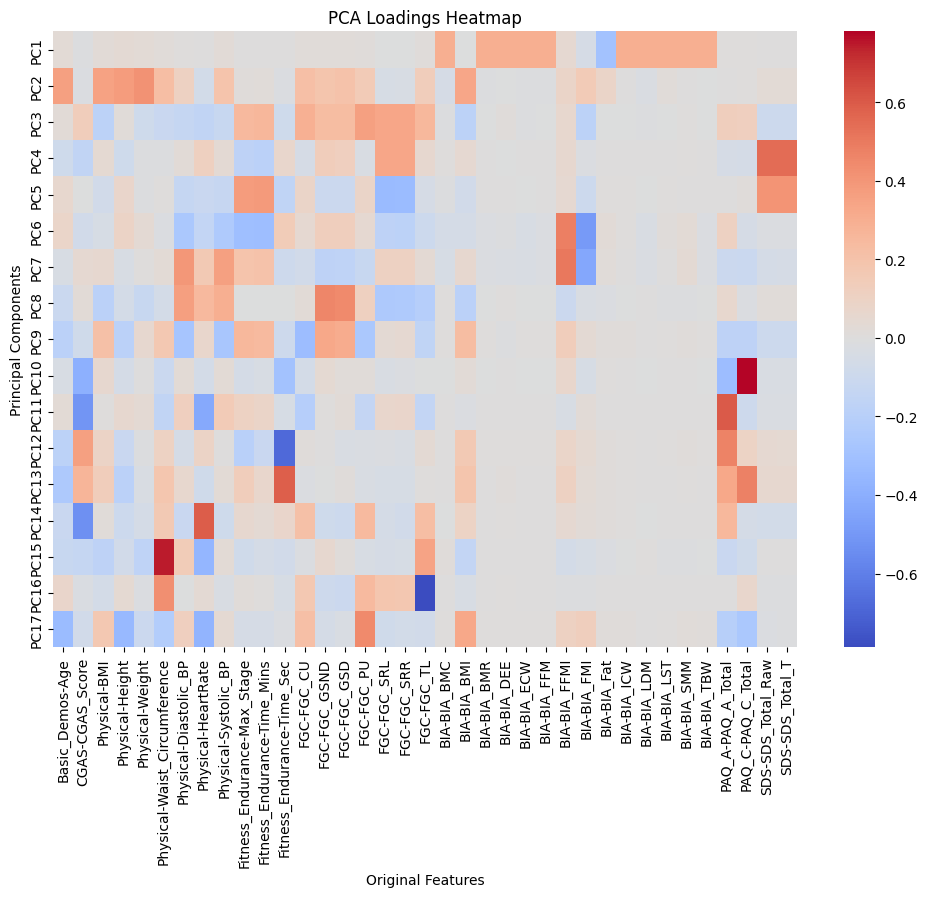

In [30]:
plt.figure(figsize=(12, 8))
sns.heatmap(loadings_df, cmap="coolwarm", annot=False, cbar=True)
plt.title("PCA Loadings Heatmap")
plt.xlabel("Original Features")
plt.ylabel("Principal Components")
plt.show()

## Make Final Train

In [31]:
X_train = pd.concat([X_train_pca_df, X_train[categorical_cols].reset_index(drop=True)], axis=1)
X_val = pd.concat([X_val_pca_df, X_val[categorical_cols].reset_index(drop=True)], axis=1)

print("Final Training Dataset After PCA:")
print(X_train.head())

Final Training Dataset After PCA:
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  1.637644 -2.395143  1.219921  1.954701 -0.662906  4.254275  6.997115   
1  0.250917  4.118156 -3.911571  1.423956 -1.266544 -0.004175 -1.037860   
2  0.569625  2.322210  1.996613 -1.195068 -0.956015  0.355424 -0.263447   
3  0.067482  0.987939  0.228466  0.013581  0.650018  0.533294 -0.663105   
4  1.258408  3.776153 -1.513738 -2.900728  2.059078  1.847246 -0.992816   

        PC8       PC9      PC10  ...  FGC-FGC_CU_Zone  FGC-FGC_GSND_Zone  \
0  0.342737  1.078466  1.068758  ...              1.0                2.0   
1 -1.733704  0.204469  3.316796  ...              0.0                2.0   
2 -1.524016 -0.015424  0.006734  ...              1.0                1.0   
3 -0.830782 -0.247990  0.309505  ...              1.0                2.0   
4  2.046581 -0.098378  0.176782  ...              1.0                1.0   

   FGC-FGC_GSD_Zone  FGC-FGC_PU_Zone  FGC-FGC_SRL_Zone  FG

### 